In [1]:
## 다이나믹 프로그래밍 알고리즘은 문제를 각각의 작은 문제로 나누어 해결한 결과를
## 저장해뒀다가 나중에 큰 문제의 결과와 합하여 풀이하는 알고리즘이다.

## 다이나믹 프로그래밍을 이용하면 '최적 부분 구조'(Optimal Substructure)를 갖고 있는 문제를 풀이할 수 있다.
## 비슷한 유형의 문제를 풀이한다는 점에서 서로 비교 대상이 되기도 하는데,
## 그리디 알고리즘은 항상 그 순간에 최적이라고 생각되는 것을 선택하면서 풀이해 나가는 것이고,
## 다이나믹 프로그래밍은 '중복된 하위 문제들'(Overlapping Subproblem)의 결과를 저장해뒀다가 풀이해 나간다는 차이가 있다.
## 여기서 중요한 점은 '중복된' 문제들이란 점이며, 중복되지 않는 문제들은 다이나믹 프로그래밍으로 풀지 않는다.

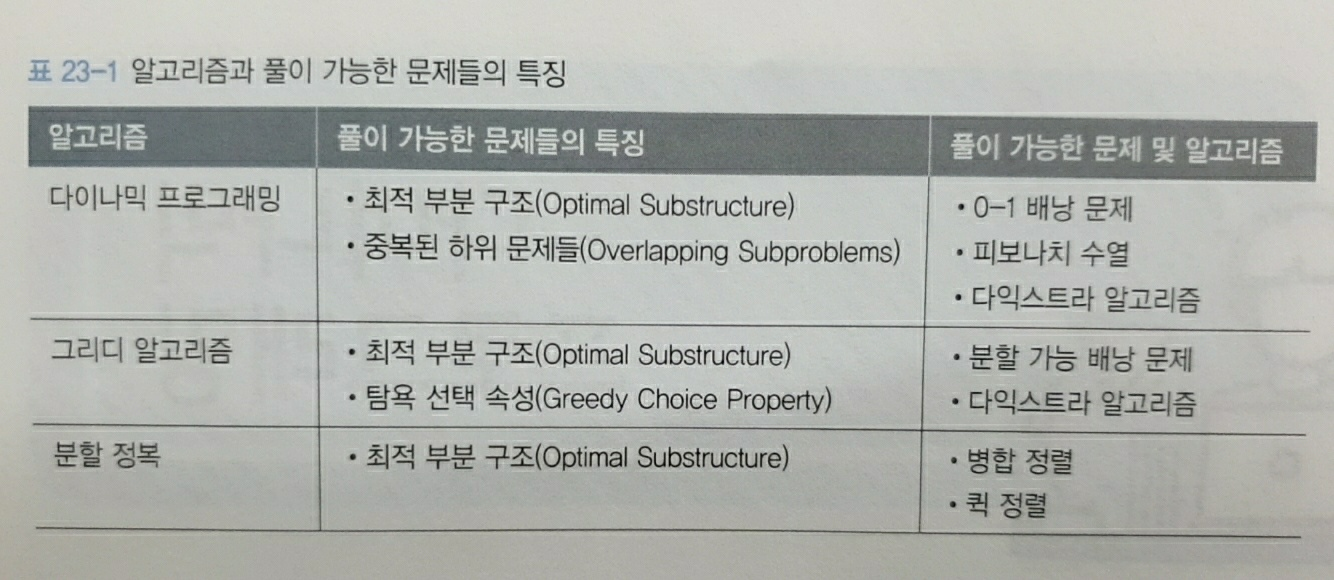

In [2]:
from IPython.display import Image

Image('표23-1.jpg', width="600")

In [3]:
## 대부분의 재귀 알고리즘은 최적 부분 구조 문제를 풀 수 있다.
## 병합 정렬, 퀵 정렬과 같은 분할 정복 알고리즘은 '중복된 하위 문제들'을 푸는 것이 아니기 때문에
## 다이나믹 프로그래밍으로 분류하지 않는다.
## 배낭 문제 중 '분할 가능 배낭 문제'는 '탐욕 선택 속성'이 있기 때문에 그리디 알고리즘으로 풀 수 있다.
## 다익스트라 알고리즘은 다이나믹 프로그래밍과 그리디 알고리즘 둘 다 해당하는 경우인데,
## BFS 시 항상 최단 경로를 찾는 탐욕 선택 속성을 갖는 그리디 알고리즘이면서,
## 이미 계산한 경로는 저장해두었다가 활용하며 중복된 하위 문제들을 푸는 다이나믹 알고리즘이기도 하다.

# 최적 부분 구조

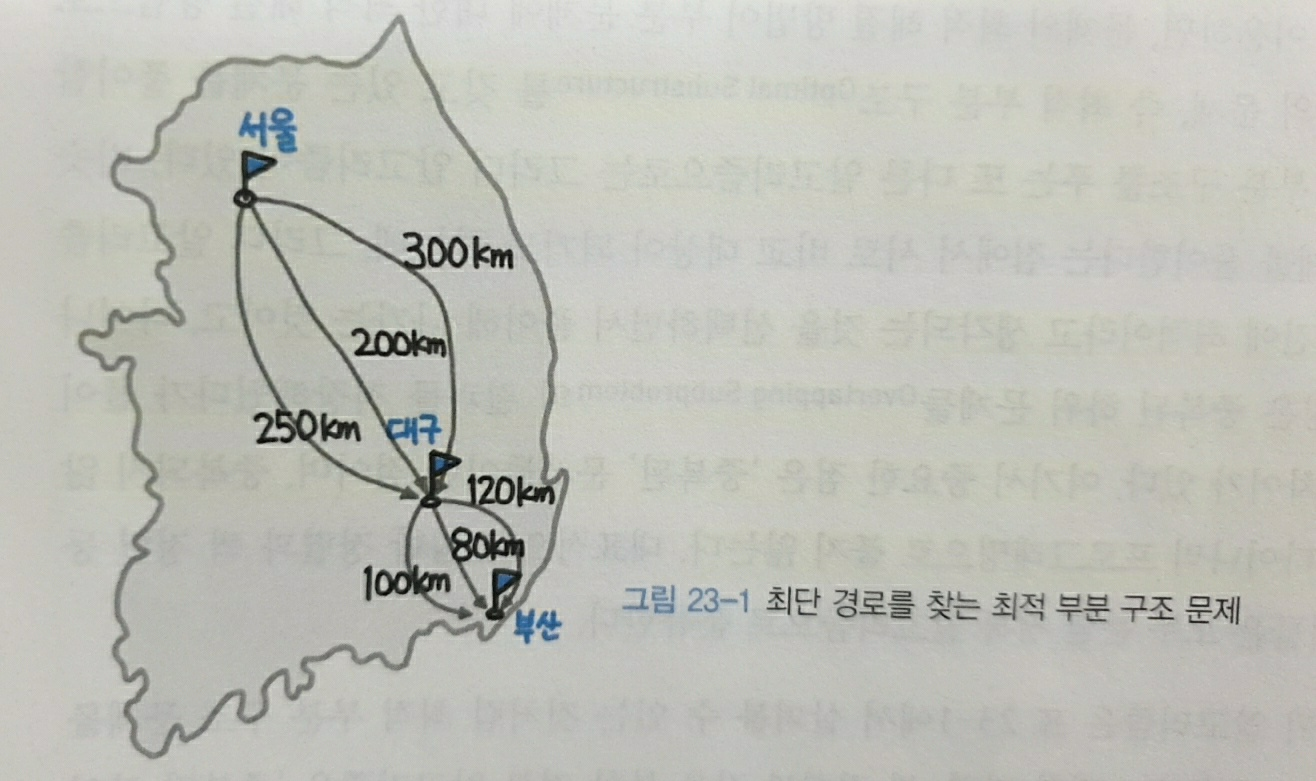

In [4]:
from IPython.display import Image

Image('그림23-1.jpg', width="400")

In [5]:
## 최적 부분 구조에 대해 좀 더 살펴보자. 
## 서울에서 부산까지 가는 최단 경로를 찾는 간단한 예를 들어본다.
## 그림에서 보듯이, 서울에서 대구까지 가는 경로는 3가지가 있으며, 대구에서 부산까지도 마찬가지로 3가지 경로가 있다.
## 서울에서 부산까지의 최단 경로는 서울에서 대구까지 최단경로와 대구에서 부산까지 최단 경로로 구성된다.
## 따라서 이 문제의 최적 해결 방법은 부분 문제에 대한 최적 해결 방법으로 구성된다.

## 이러한 구조를 최적 부분 구조라 하며, 이런 유형의 문제는 분할 정복으로 풀 수 있다.
## 또한 다이나믹 프로그래밍 또는 그리디 알고리즘으로 접근해볼 수 있는 문제가 된다.

## 그러나 만약 서울에서 부산까지 바로 연결되는 고속도로가 새롭게 개통되어 더 이상 대구를 거칠 필요가 없다면,
## 이 문제는 더 이상 최적 부분 구조가 아니다.
## 더는 분할 정복으로 풀 수 없으며, 다이나믹 프로그래밍이나 그리디 알고리즘으로도 풀이할 수 없다.

# 중복된 하위 문제들

In [6]:
## 다이나믹 알고리즘으로 풀 수 있는 문제들과 다른 문제들의 결정적인 차이는 중복된 하위 구조를 갖는다는 점이다.

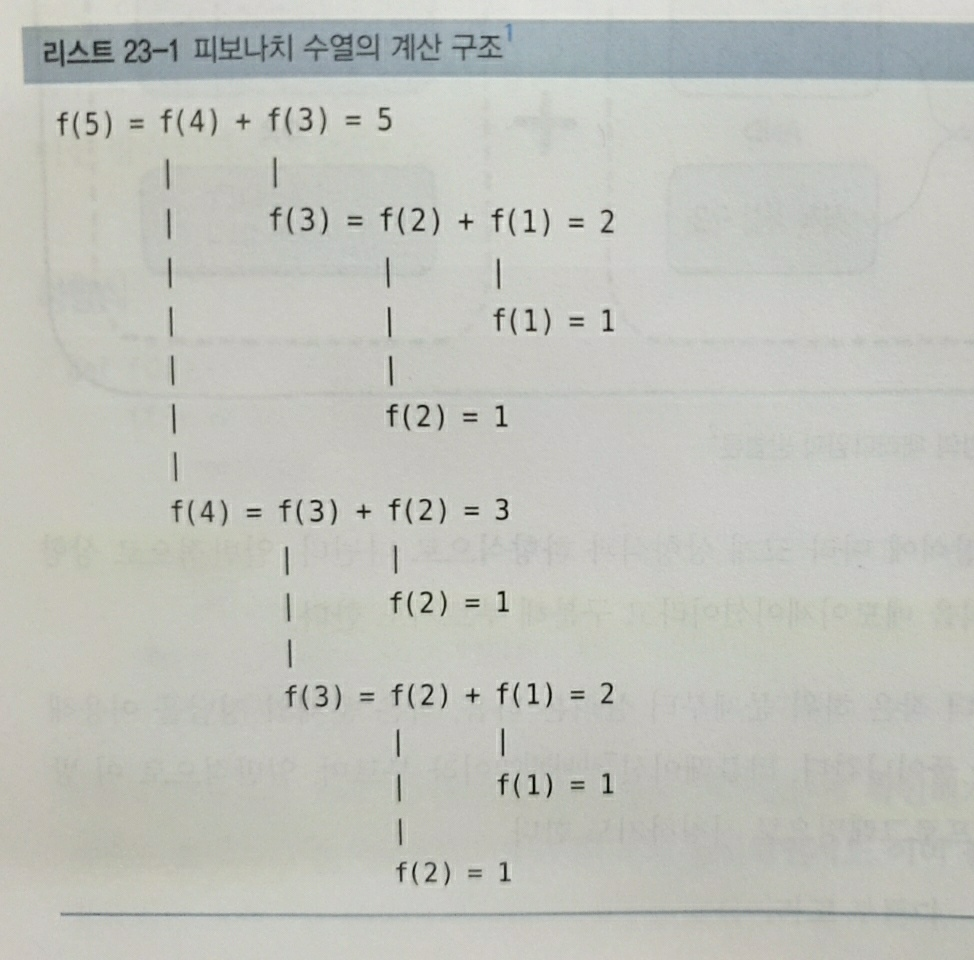

In [7]:
from IPython.display import Image

Image('리스트23-1.jpg', width="400")

In [8]:
## 피보나치 수열의 경우 리스트 23-1과 같은 계산 구조를 띤다.
## 이처럼 피보나치 수열을 재귀로 풀면 반복적으로 동일한 하위 문제들이 발생한다.

# 다이나믹 프로그래밍 방법론

In [9]:
## 지금까지 최적 부분 구조와 중복된 하위 문제들로 구성된 다이나믹 프로그래밍 패러다임을 살펴봤고,
## 이제부터는 다이나믹 프로그래밍의 방법론을 알아볼 차례다.

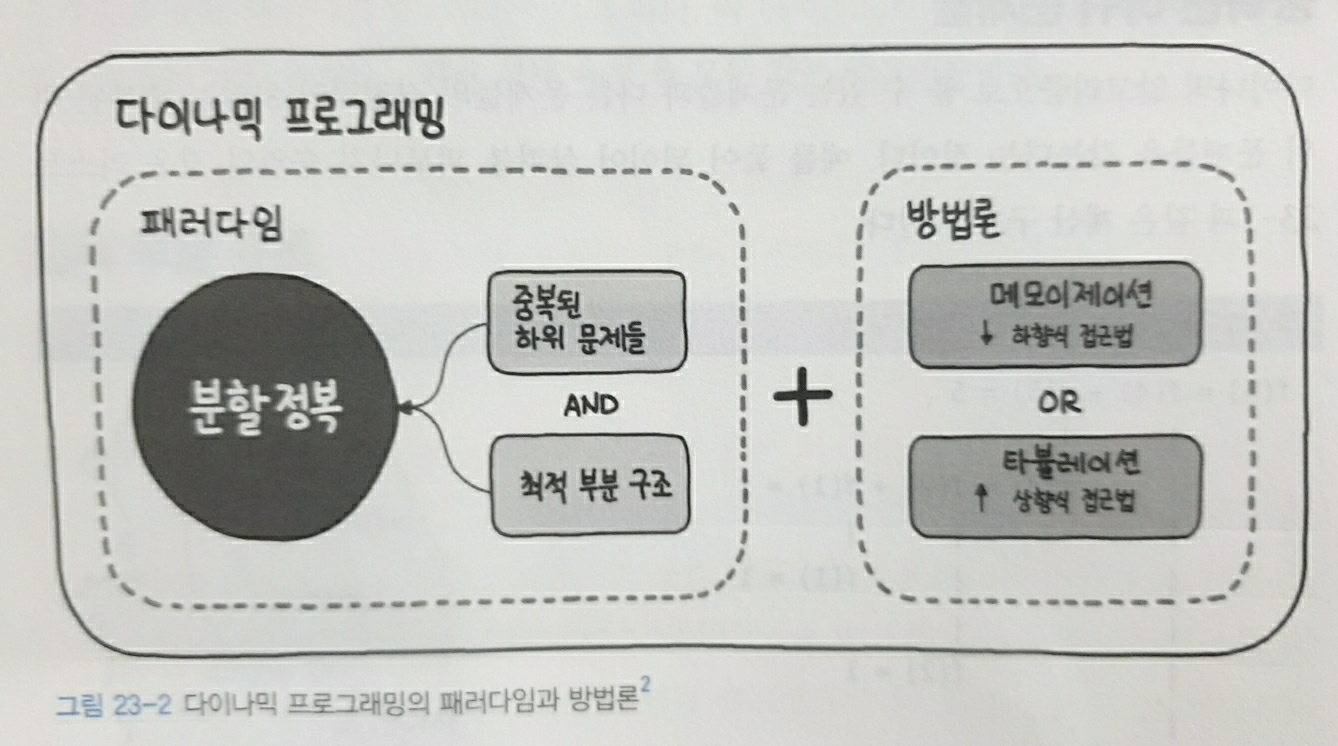

In [10]:
from IPython.display import Image

Image('그림23-2.jpg', width="500")

In [11]:
## 이 그림에서 방법론을 방식에 따라 크게 상향식과 하향식으로 구분할 수 있다.
## 일반적으로 상향식을 '타뷸레이션'(Tabulation), 하향식을 '메모이제이션'(Memoization)이라고 구분해 부르기도 한다.

```python
- 상향식(Bottom-Up): 더 작은 하위 문제부터 살펴본 다음, 작은 문제의 정답을 이용해 큰 문제의 정답을 풀어나간다.

        def fib(n):
            dp[0] = 0
            dp[1] = 1
            
            for i in range(2, n + 1):
                dp[i] = dp[i - 1] + dp[i - 2]
            
            return dp[n]
            
            
            상향식 방법론은 작은 하위 문제부터 차례대로 정답을 풀어나가며 큰 문제의 정답을 만든다.
            이 방식을 타뷸레이션이라 하며, 데이터를 테이블 형태로 만들면서 문제를 풀이한다고 하여 붙여진 이름이다.
            
            
- 하향식(Top-Down): 하위 문제에 대한 정답을 계산했는지 확인해가며 문제를 자연스러운 방식으로 풀어나간다.

        def fib(n):
            if n <= 1:
                return n
                
            if dp[n]:
                return dp[n]
                
            dp[n] = fib(n - 1) + fib(n - 2)
            
            return dp[n]
            
            
            하향식 방법론은 하위 문제에 대한 정답을 계산 했는지 확인해가며 문제를 재귀로 풀어나간다.
            이 방식을 메모이제이션이라 지칭한다.
```

In [12]:
## 사실 대부분의 다이나믹 프로그래밍 문제는 어렵기 때문에, 대면 인터뷰 시에는 다양한 문제를 출제하기가 쉽지 않고,
## 결국 기본에 가장 충실한 문제를 낼 수밖에 없다.

## 피보나치 수열은 그중에서도 다이나믹 프로그래밍의 가장 기본 중의 기본이라 할 수 있는 문제다.
## 피보나치 수열은 재귀와 다이나믹 프로그래밍 모두를 한 번에 평가할 수 있는 매우 좋은 문제며,
## 가장 기본적인 문제로, 매우 많은 기업에서 재귀에 관한 질문을 할 때 먼저 나오는 문제이기도 하다.

## 이 문제에 대한 다양한 풀이법만 제대로 익혀도 다이나믹 프로그래밍의 기본은 충분히 익혔다고 할 수 있다.
## 그런데 의외로 많은 면접자들이 막상 이 문제를 접하면 당황해서 풀지 못하는 경우가 있다.
## 특히 학교를 졸업한 지가 오래 됐거나 또는 컴퓨터과학을 전공하지 않아 배워본 적이 없다면
## 다이나믹 프로그래밍은커녕 재귀조차 아예 손도 대지 못하는 경우가 많다.
## 안타까운 현실이다.

## 피보나치 수열조차 제대로 풀이하지 못하는 면접자들 중 모든 면접 과정을 끝까지 통과해 채용되는 경우를 거의 보지 못했다.
## 이 문제를 알고 모르고가 중요한 게 아니라, 그만큼 전반적인 문제 풀이 능력이 떨어지기 때문에 
## 전체적으로 좋은 평가를 받을 수 없었기 때문일 것이다.
## 적어도 기본적인 피보나치 수열 문제는 여러 번 반복해서 완벽하게 숙지하자.

# 85. 피보나치 수

### LeetCode 509. Fibonacci Number

##### 피보나치 수를 구하라.

In [13]:
## 피보나치 수를 구하는 가장 기본적인 풀이 알고리즘의 수도코드는 다음과 같다.

```python
Fib(n)
    if n <= 1
        return n
    else
        return Fib(n - 1) + Fib(n - 2)
    
```

In [14]:
## 이 수도코드에서 n = 5라면, 다음과 같이 총 15번의 연산을 진행하게 된다.

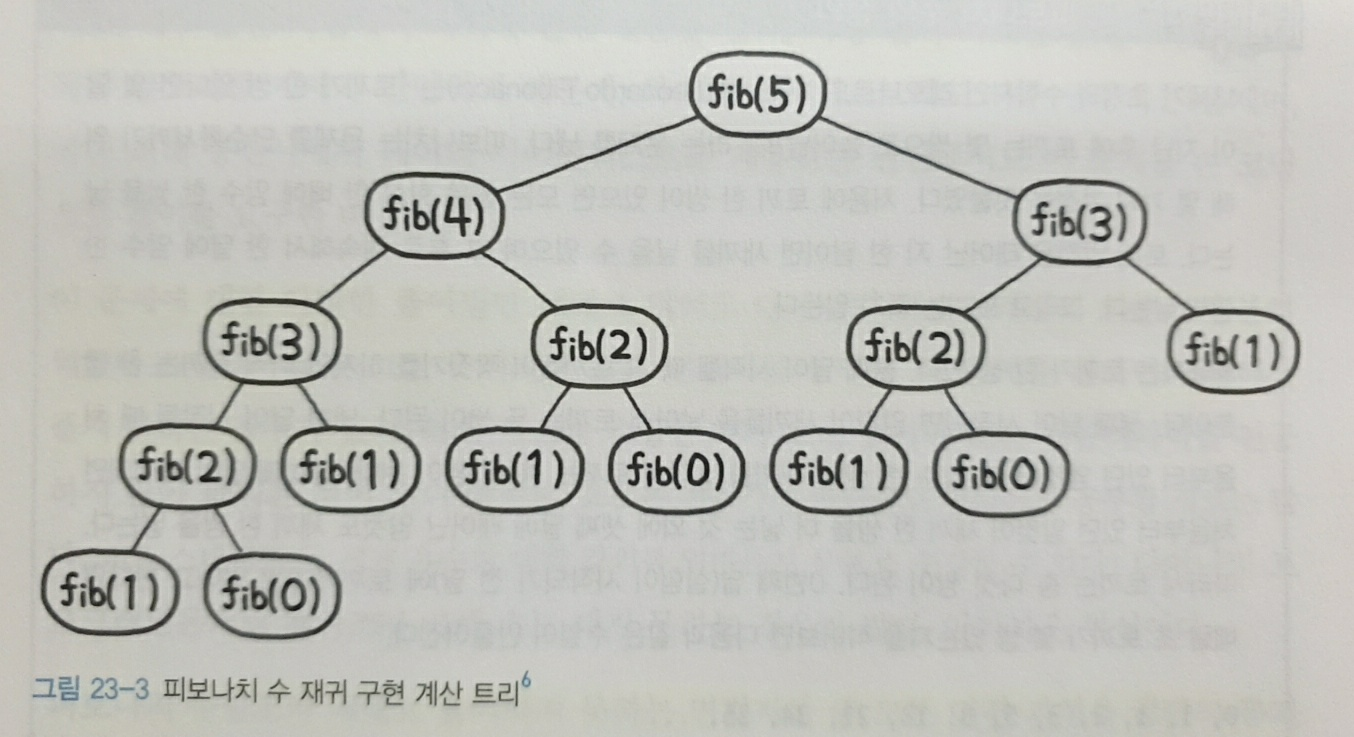

In [15]:
from IPython.display import Image

Image('그림23-3.jpg', width="500")

##### 풀이 1 재귀 구조 브루트 포스

In [16]:
## 가장 먼저, 설명에서 제시한 피보나치 수의 가장 기본적인 알고리즘부터
## 위의 수도코드를 이용해 구현해본다.

In [17]:
class Solution:
    def fib(self, N: int) -> int:
        print(N, end=' ')
        if N <= 1:
            return N
        
        return self.fib(N - 1) + self.fib(N - 2)

In [18]:
ans = Solution()

# 출력이 그림 23-3의 전위 순회 형태로 나옴
ans.fib(5)

5 4 3 2 1 0 1 2 1 0 3 2 1 0 1 

5

In [19]:
## 브루트 포스로는 안 풀릴 것 같지만 이렇게 기본적인 알고리즘으로도 풀리긴 한다.
## 다만, 이 방식은 가능한 풀이 방법 중 가장 느릴 것이다.
## 이제 다른 방식으로 최적화를 해보자.

##### 풀이 2 메모이제이션

In [20]:
## 앞서 하향식 풀이로 정리한 것이 바로 이 문제의 메모이제이션 풀이다.

In [21]:
import collections

class Solution:
    dp = collections.defaultdict(int)
    
    def fib(self, N: int) -> int:
        if N <= 1:
            return N
        
        if self.dp[N]:
            return self.dp[N]
        
        self.dp[N] = self.fib(N - 1) + self.fib(N - 2)
        
        return self.dp[N]

In [22]:
## 브루트 포스 풀이와 유사하게 재귀로 계산해 나가지만, 이미 계산한 값은 저장해뒀다가 바로 리턴한다.
## 앞서 fib(5)일 때 15번의 연산을 진행하던 구조는 이 메모이제이션 풀이에서는 9번의 연산만으로 풀이할 수 있게 된다.

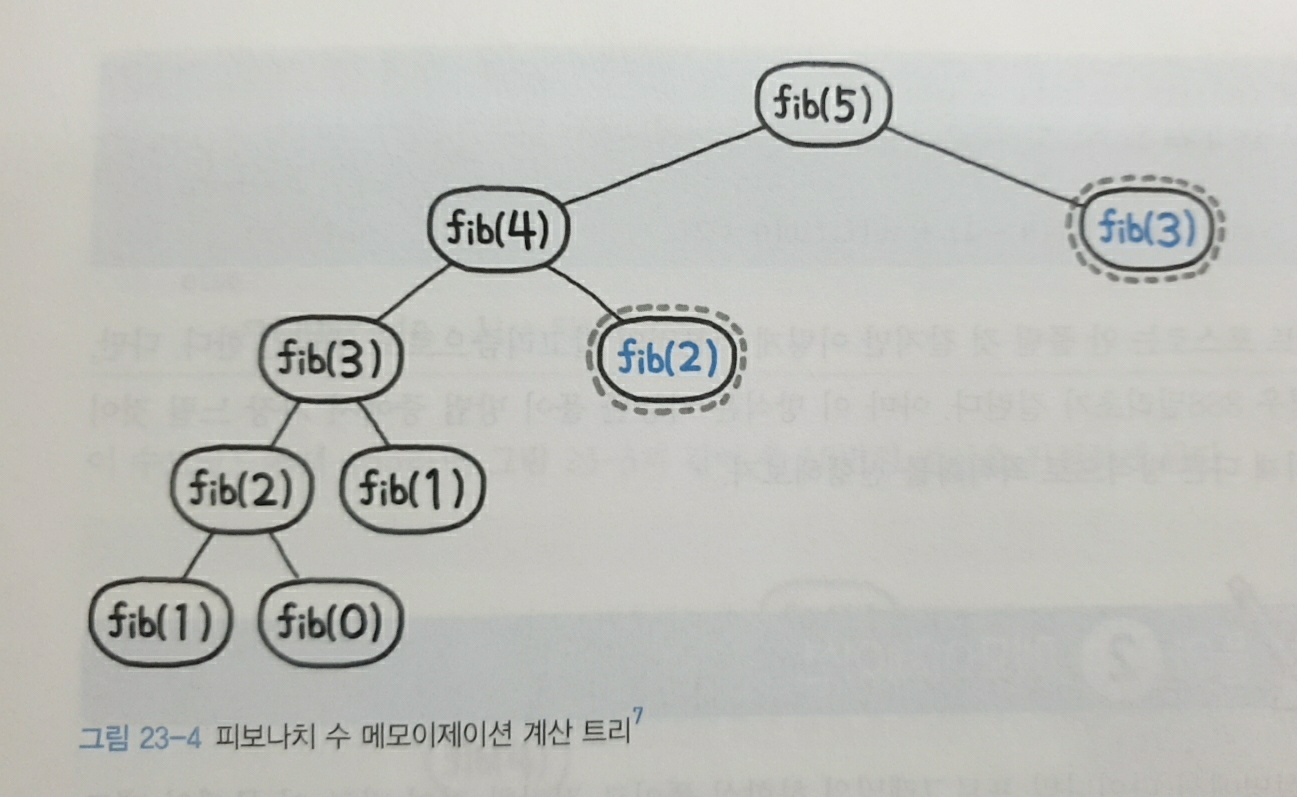

In [23]:
from IPython.display import Image

Image('그림23-4.jpg', width="500")

In [24]:
## 만약 시작이 fib(5)가 아니라 5보다 훨씬 큰 수라면 성능 차이는 더 클 것이다.

##### 풀이 3 타뷸레이션

In [25]:
## 이제 상향식 풀이를 살펴보자
## 재귀를 사용하지 않고 반복으로 풀이하며, 작은 값부터 직접 계산하면서 타뷸레이션한다.
## 미리 계산을 해두는 것인데, 다른 복잡한 다이나믹 프로그래밍 문제와는 달리 타뷸레이션이 일차원 선형 구조라 복잡하지 않고,
## 구조 자체도 단순해 이해가 쉬운 편이다.
## 메모이제이션과 마찬가지로 실행 속도도 당연히 빠르다.

In [26]:
class Solution:
    dp = collections.defaultdict(int)
    
    def fib(self, N: int) -> int:
        self.dp[1] = 1
        
        for i in range(2, N + 1):
            self.dp[i] = self.dp[i - 1] + self.dp[i - 2]
            
        return self.dp[N]

##### 풀이 4 두 변수만 이용해 공간 절약

In [27]:
## 그런데 앞서 풀이는 dp라는 딕셔너리에(사실 단순 배열만 사용해도 충분하다) 결과를 차곡차곡 담아 나갔지만
## 사실 변수 2개만 있어도 충분하다.

In [28]:
def fib(self, N: int) -> int:
    x, y = 0, 1
    
    for i in range(0, N):
        x, y = y, x + y
    
    return x

In [29]:
## 이 경우 메소드 바깥에 클래스 멤버 변수도 선언할 필요가 없기 때문에 코드는 훨씬 더 간결해진다.
## 공간 복잡도도 O(n)에서 O(1)로 줄어든다.
## 시간 복잡도는 동일한 O(n)이므로 매우 효율적이다.

##### 풀이 5 행렬

In [30]:
## 놀랍게도 앞서 풀이들보다 훨씬 더 빠른 알고리즘이 있다.
## n번째 피보나치 수를 O(logn)번의 연산 만으로 구할 수 있는 방법인데,
## 행렬식으로 표현하고 n번째 피보나치 수를 구하는 방법이다.
## 사실 이 방식을 설명하는 것은 이 책의 범위를 넘어서고 
## 다이나믹 프로그래밍과도 관련이 없으므로 간단히 소개하는 정도로 마무리 한다.

In [31]:
## 선형대수 관점에서 행렬의 n승을 계산하는 방식으로, 
## 행렬 계산을 편리하게 하기 위해 넘파이 NumPy 모듈을 사용했으므로 리트코드에서는 동작하지 않을 것이다.
## 이렇게 더 빨리 계산할 수 있는 방법이 있다는 정도만 알아두기 바란다.

In [32]:
import numpy as np

def fib(n):
    M = np.matrix([[0, 1], [1, 1]])
    vec = np.array([[0], [1]])
    
    return np.matmul(M ** n, vec)[0]

In [33]:
fib(10)

matrix([[55]])

# 0-1 배낭 문제

In [34]:
## 다이나믹 프로그래밍의 대표적인 문제라 할 수 있는 피보나치 수를 살펴봤다.
## 이제 또 다른 대표적인 문제 중 하나인 배낭 문제를 살펴보자.
## 앞서 21장에서 '분할 가능 배낭 문제'를 그리디 알고리즘으로 풀어본 바 있다.
## '탐욕 선택 속성'이 있는 문제였는데, 이번에는 짐을 쪼갤 수 없는 '0-1 배낭 문제'를 풀이해 보자.
## 이 문제는 '탐욕 선택 속성'이 아니라 '중복된 하위 문제 속성'을 가지고 있으므로 다이나믹으로는 풀 수 있다.

In [35]:
## 단가 순으로 그리디하게 배치해서 풀이했던 분할 가능 배낭 문제와 달리, 짐을 쪼갤 수 없다.
## 이 경우 모든 경우의 수를 계산해야 하며, 이렇게 모든 경우의 수를 계산하는 문제에서 다이나믹 프로그래밍은 위력을 발휘한다.

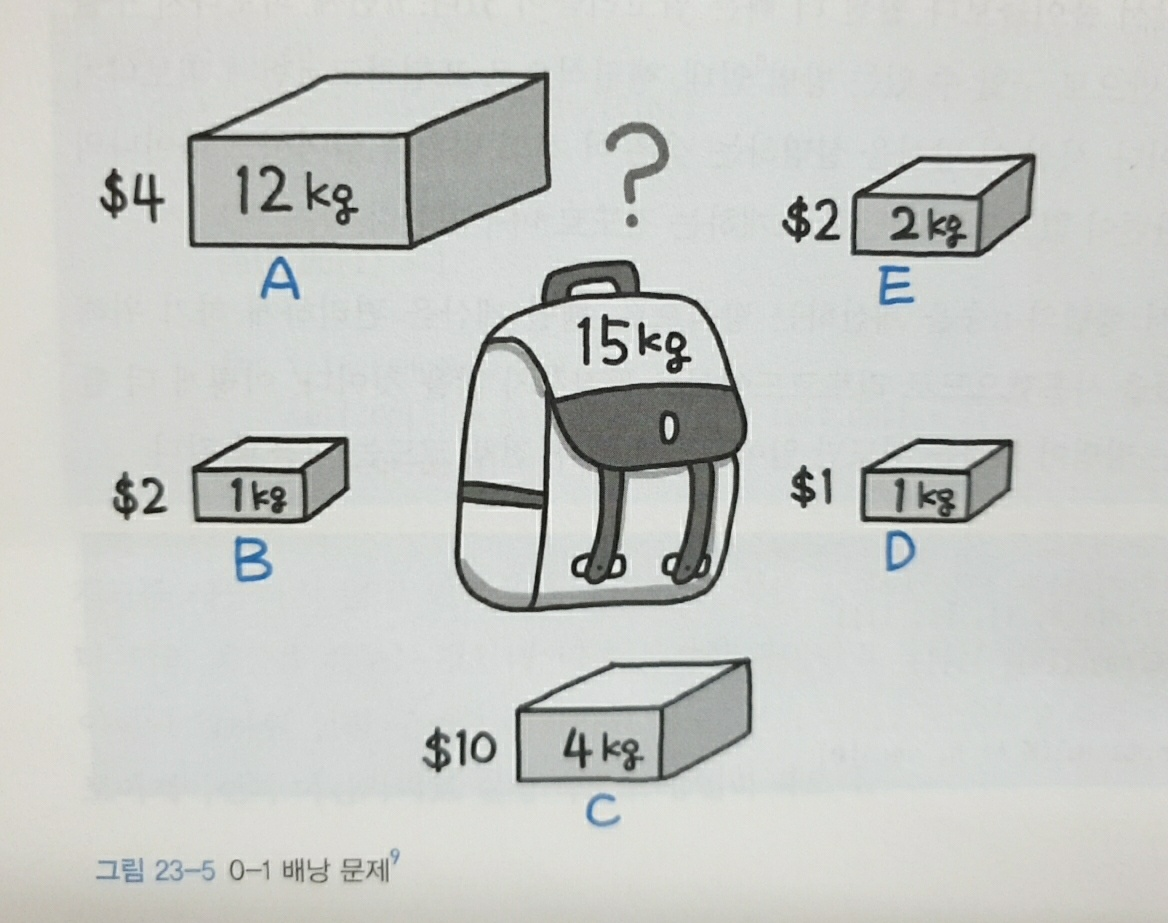

In [36]:
from IPython.display import Image

Image('그림23-5.jpg', width="400")

In [37]:
## 먼저, 입력값으로 짐을 정의하고 zero_one_knapsack() 풀이 함수를 호출한다.

```python
cargo = [
    (4, 12),
    (2, 1),
    (10, 4),
    (1, 1),
    (2, 2),
]

r = zero_one_knapsack(cargo)
```

In [38]:
## zero_one_knapsack() 함수는 다음과 같이 정의한다.

```python
def zero_one_knapsack(cargo):
    capacity = 15
    pack = []
    ...
```

In [39]:
## pack 이라는 리스트 변수에 6 x 16 행렬 형태의 중간 결과 테이블이 생성될 것이다.
## 즉 이 테이블을 글자 그대로 타뷸레이션하는 다이나믹 프로그래밍 풀이가 될 것이다.
## 테이블 크기의 기준은 짐의 최대 개수 + 1, 배낭의 최대 용량 + 1 이렇게 6 x 16이며, 
## 이 테이블 각각의 셀에는 그 위치까지의 짐의 개수와 배낭의 용량에 따른 최댓값이 담기게 된다.
## 실제로 어떤 값인지는 먼저 전체 코드부터 먼저 살펴본 이후에 다시 정리해보자.

In [40]:
def zero_one_knapsack(cargo):
    capacity = 15
    pack = []
    
    for i in range(len(cargo) + 1):
        pack.append([])
        for c in range(capacity + 1):
            if i == 0 or c == 0:
                pack[i].append(0)
            elif cargo[i - 1][1] <= c:
                pack[i].append(
                    max(
                        cargo[i - 1][0] + pack[i - 1][c - cargo[i - 1][1]],
                        pack[i - 1][c]
                    ))
            else:
                pack[i].append(pack[i - 1][c])
                
    return pack[-1][-1]

In [41]:
## 이 코드의 실행 결과로 pack에는 표 23-2와 같은 행렬 형태의 표가 생긴다.

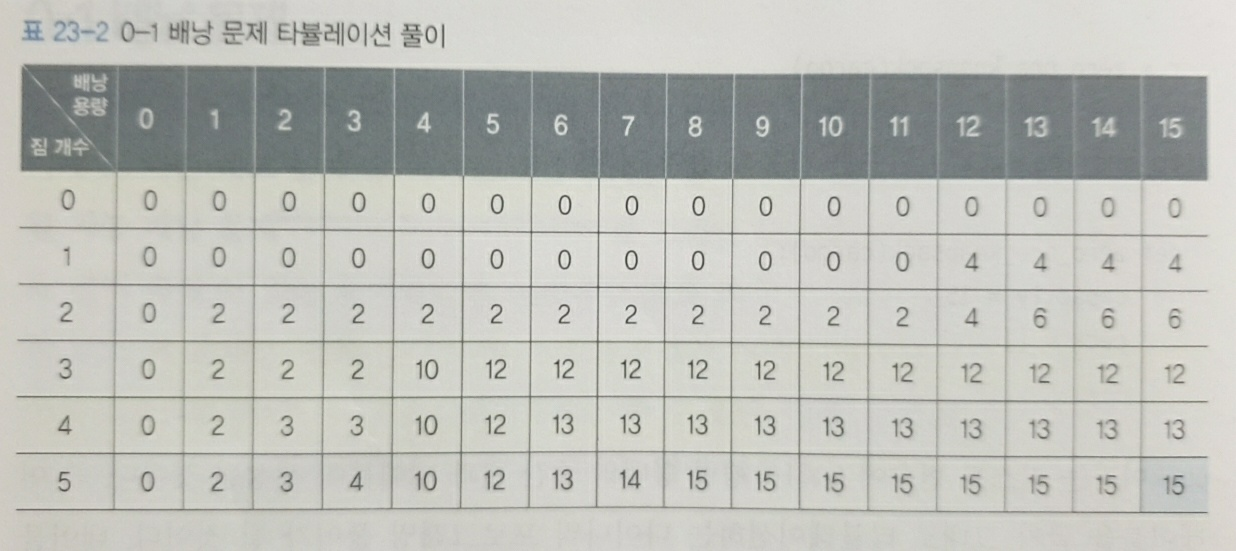

In [42]:
from IPython.display import Image

Image('표23-2.jpg', width="600")

In [43]:
## 이 표에서 세로 축은 짐의 개수, 가로축은 배낭의 용량이다.
## 각각의 셀은 그 위치까지의 짐의 개수와 배낭의 용량에 따른 최댓값이다.

## 즉 짐이 4개가 있을 때는 차례대로 ($4, 12kg), ($2, 1kg), ($10, 4kg), ($1, 1kg)일 것이고,
## 배낭의 용량이 4라면 4kg인 $10짜리 짐 하나를 담는 게 가장 이익이다.
## 따라서 4 x 4 위치의 최댓값은 10이며 표에서도 확인할 수 있다.

## 배낭의 용량이 5라면 1kg인 $2를 추가해 12가 될 수 있다.
## 마찬가지로 이 표에서도 12다.

## 이렇게 마지막 위치인 5 x 15까지 이동한 총 5개의 짐, 용량이 15인 배낭의 최댓값은 $15이며,
## 문제의 정답은 15임을 확인할 수 있다.

## 이렇게 최악의 경우 O(2^n)의 계산이 필요한 '0-1 배낭 문제를' 
## 여기서는 타뷸레이션 방식으로 O(nW)(n은 짐의 개수, W는 배낭의 용량)에 풀이해봤다.

In [44]:
## 여기까지 대표적인 2가지 다이나믹 프로그래밍 문제인 피보나치 수와 배낭 문제를 풀이해봤다.
## 사실 다이나믹 프로그래밍은 이 책의 가장 마지막 단원인 것에서도 짐작하겠지만
## 가장 난이도가 높은 문제들에 해당한다.
## 그나마 피보나치 수와 0-1 배낭문제는 그중에서도 가장 쉬운 편이다.

## 아마 온라인 코딩 테스트 중에 이런 문제들을 맞닥뜨리면 어떻게든 다이나믹 프로그래밍 풀이를 떠올려볼 수 있겠지만,
## 온사이트 화이트보드 코딩 테스트를 한다면 다이나믹 프로그래밍을 떠올려 풀이하기란 쉽지 않을 것이다.
## 처음 보는 색다른 문제를 접하고 바로 다이나믹 프로그래밍을 연상하기란 쉽지 않은 일이다.

## 이 때문에 페이스북을 비롯한 몇몇 미국 회사들은 다이나믹 프로그래밍 문제 출제를 최대한 금지한다.
## 카카오에서도 다이나믹 프로그래밍 문제는 되도록 출제하지 않았다.
## 면접을 위한 코딩 테스트는 알고리즘 경진대회가 아니며, 30분 남짓한 면접에서 실행 속도까지 측정해
## 평가하는 것은 지나치게 난이도가 높다고 판단했기 때문이다.
## 오히려 기본적인 분기문, 변수명 짓기, 반복문을 쓰는 기법 등이 훨씬 더 중요한 평가 요소가 된다.

# 86. 최대 서브 배열

### LeetCode 53. Maximum Subarray

##### 합이 최대가 되는 연속 서브 배열을 찾아 합을 리턴하라

In [45]:
## 예제 1
    ## input: [-2, 1, -3, 4, -1, 2, 1, -5, 4]
    ## output: 6
    
    ## 설명: [4, -1, 2, 1]은 합 6으로 가장 큰 서브 배열이다.

##### 풀이 1 메모이제이션

In [46]:
## 언뜻 투 포인터 문제인가 하는 생각이 들 수 있다.
## 그러나 투 포인터로 풀이하기는 어렵다.
## 그림 23-6과 같이 왼쪽 포인터가 -2이고, 오른쪽 포인터가 4라고 했을 때,
## 그 사잇값이 최대가 되기 위해서는 음수를 지나치는 방식으로 알고리즘을 구현해야 하는데
## 연속된 서브 배열을 찾아야 하는 문제인 만큼 정렬을 할 수도 없고,
## 그렇다고 다음 숫자가 뭐가 될지 모르는 상황에서 단순히 음수를 건너 뛰는 방식으로는 구현이 어렵다.
## 무엇보다 효율적으로 투 포인터로 풀이하기 위해서는 정렬이 필요하다는 점은 이미 여러 차례 언급한 바 있다.

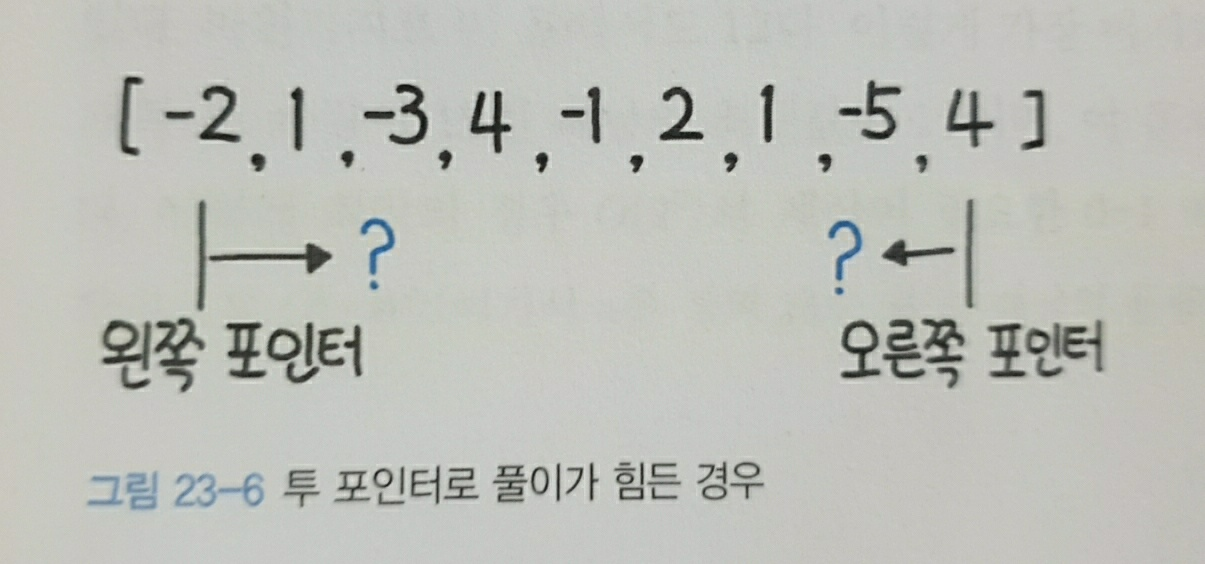

In [47]:
from IPython.display import Image

Image('그림23-6.jpg', width="400")

In [48]:
## 만약 그림 23-7과 같이 중간에 100과 같은 큰 수가 있다해도, -28, -7 같은 큰 음수 값을 과감히 건너뛰기란 쉽지 않을 것이다.

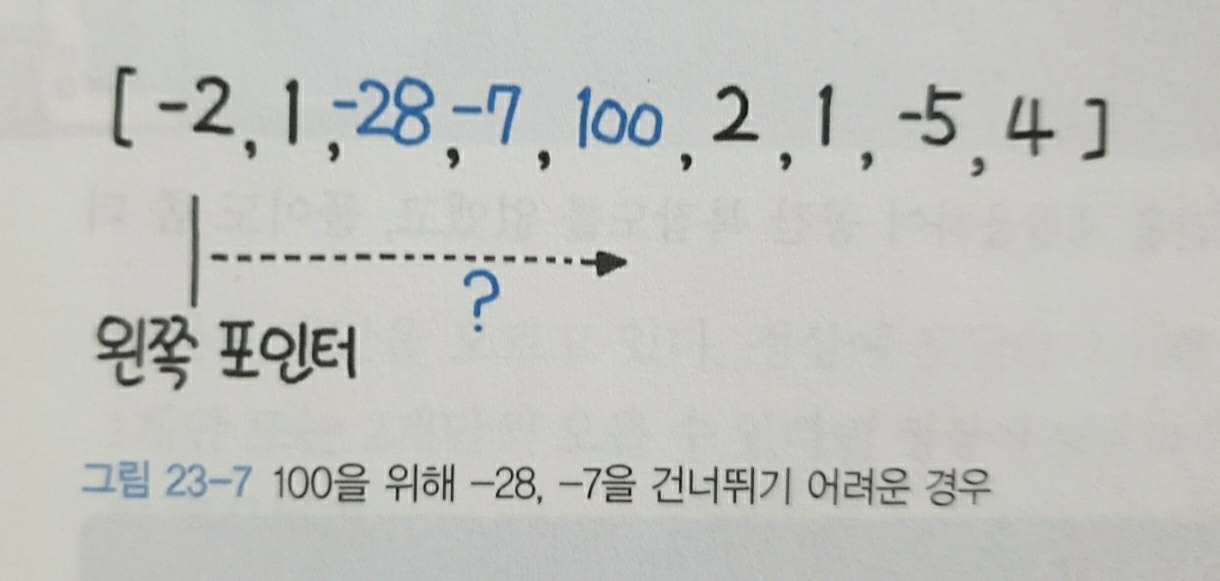

In [49]:
from IPython.display import Image

Image('그림23-7.jpg', width="400")

In [50]:
## 그렇다면 이 문제는 어떻게 풀이하는 게 좋을까?
## 메모이제이션을 이용해 그림 23-8과 같은 결과를 만들어보자.

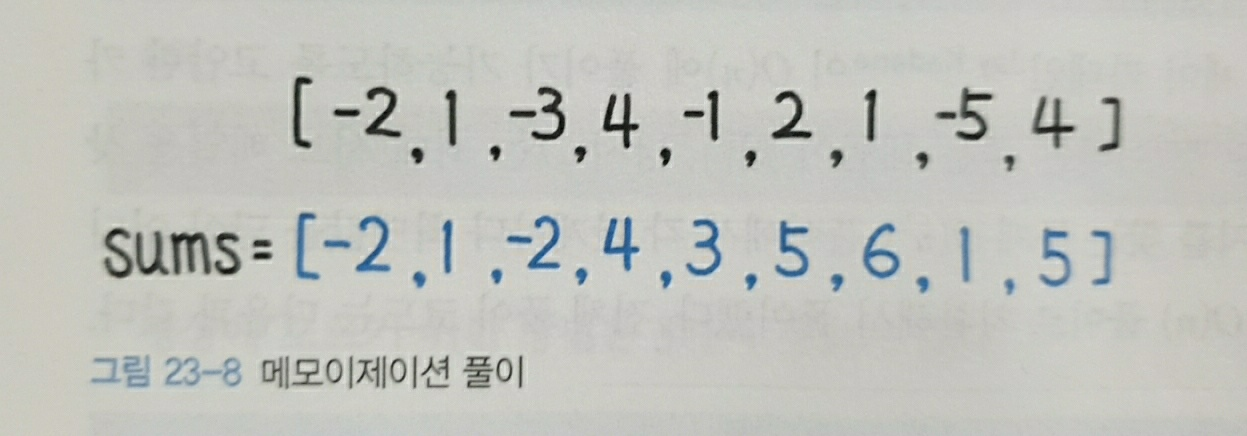

In [51]:
from IPython.display import Image

Image('그림23-8.jpg', width="400")

In [52]:
## 앞에서부터 계속 값을 계산하면서 누적 합을 계산한다.
## 이전 값을 계속 더해나가되 0이하가 되면 버린다. 최댓값을 찾는데 0 이하인 값은 굳이 서브 배열에 포함할 이유가 없기 때문이다.

## 이렇게 메모이제이션으로 값을 더해 나간 sums에서 최댓값을 추출하면 서브 배열의 최댓값을 찾을 수 있다.
## 그림에서 sums라는 별도 변수를 사용했는데 가만히 살펴보면 추가 변수가 없이도 충분히 처리가 가능할 것 같다.

In [53]:
from typing import *

def maxSubArray(nums: List[int]) -> int:
    for i in range(1, len(nums)):
        nums[i] += nums[i - 1] if nums[i - 1] > 0 else 0
    return max(nums)

In [54]:
## 기존 nums에 합을 함께 넣었다. 공간을 재활용하여 공간 복잡도를 없앴고 풀이도 좀 더 깔끔해졌다.

##### 풀이 2 카데인 알고리즘

In [55]:
## 원래 이 문제는 1977년에 제안된 매우 유명한 컴퓨터과학 알고리즘 문제로서, 
## 제이 카데인이 O(n)에 풀이가 가능하도록 고안한 '카데인 알고리즘'(Kadane's Algorithm)이라는 좋은 해법이 있다.
## 당시 그는 최대 서브 배열을 찾기 위해 어디서 시작되는지를 찾는 문제 O(n^2) 풀이에서 
## 각 단계마다 최댓값을 담아 어디서 끝나는지를 찾는 문제 O(n) 풀이로 치환해서 풀이했다.

In [56]:
import sys

def maxSubArray(nums: List[int]) -> int:
    best_sum = -sys.maxsize
    current_sum = 0
    for nums in nums:
        current_sum = max(num, current_sum + num)
        best_sum = max(best_sum, current_sum)
        
    return best_sum

In [57]:
## 이전 풀이에서는 매번 계산해서 넣기만 하고 마지막에 max()를 전체 계산해서 가져오게 했지만
## 당시 제이 카데인은 이런 형태로 매번 best_sum을 계산하게 했다.
## 하지만 사실상 동일한 코드로 볼 수 있으며, 속도 또한 양쪽 모두 동일하다.

# 87. 계단 오르기

### LeetCode 70. Climbing Stairs

```
당신은 계단을 오르고 있다. 정상에 도달하기 위해 n 계단을 올라야 한다.
매번 각각 1단계 또는 2단계씩 오를 수 있다면 정상에 도달하기 위한 방법은 몇 가지 경로가 되는지 계산하라
```

In [58]:
## 예제 1
    ## input: 3
    ## output: 3

```
- 설명
    정상에 오르기 위한 방법은 3가지 경로가 있다.
    
    a. 1계단 + 1계단 + 1계단
    b. 1계단 + 2계단
    c. 2계단 + 1계단
   
```

##### 풀이 1 재귀 구조 브루트 포스

In [59]:
## 언뜻 생각해보면 풀이가 쉽지 않다. 모든 경우의 수를 다 찾아야 한다니 상당히 풀기 어려워 보인다.
## 그러나 다음 그림 23-9와 같이 경우를 하나씩 그려보면 기본적으로 피보나치 수와 동일한 유형의 문제다.
## 다만 방법과 형식이 달라 연상하기 어려울 뿐이며, 동일한 방식으로 풀이할 수 있다.

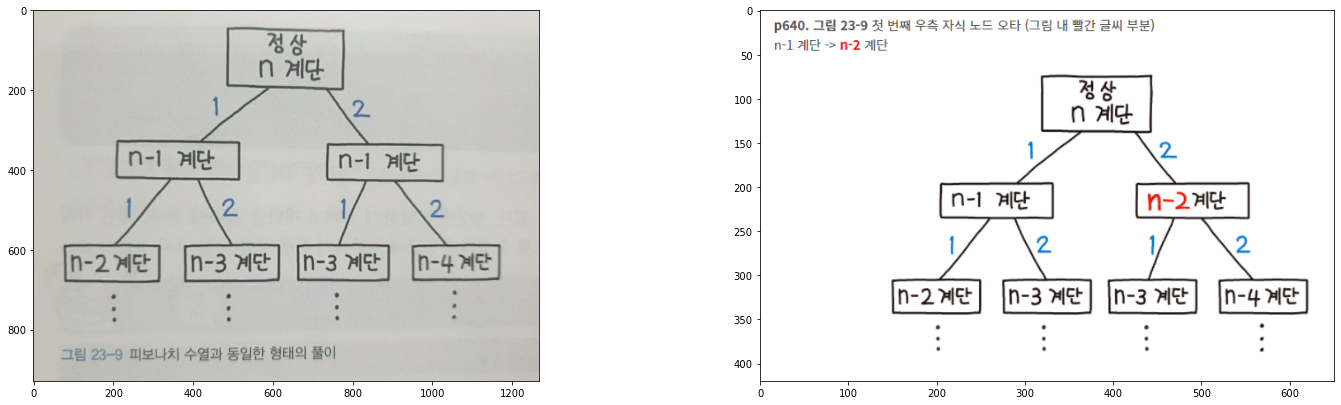

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
columns = 2
images = ["그림23-9.jpg", "그림23-9 수정.jpg"]
for i, path in enumerate(images):
    image = plt.imread(path)
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [61]:
class Solution:
    def climbStairs(self, n: int) -> int:
        if n == 1:
            return 1
        if n == 2:
            return 2
        return self.climbStairs(n - 1) + self.climbStairs(n - 2)

In [62]:
ans = Solution()

ans.climbStairs(5)

8

In [63]:
## 그러나 이 방법은 타임아웃으로 풀리지 않는다.
## 역시나 다이나믹 프로그래밍을 활용할 수밖에 없다.

In [64]:
## **** 개인적인 해석 ****
    
    ## 정상 이전의 각 계단들까지도 오를 수 있는 가짓수가 있을 것이므로 중복 하위 문제 속성을 가지므로
    ## 단순 재귀나 다이나믹 프로그래밍으로 풀 수 있음

##### 풀이 2 메모이제이션

In [65]:
class Solution:
    dp = collections.defaultdict(int)
    
    def climbStairs(self, n: int) -> int:
        if n <= 2:
            return n
        
        if self.dp[n]:
            return self.dp[n]
        
        self.dp[n] = self.climbStairs(n - 1) + self.climbStairs(n - 2)
        
        return self.dp[n]

In [66]:
## 이 풀이의 전체 코드를 살펴보면, 피보나치 수와는 초깃값만 약간 다를 뿐 메모이제이션으로 풀이하는 방식은 동일하다.
## 사실상 동일한 코드며 당연히 실행 또한 빠르게 잘 된다.
## 이처럼 피보나치 수 문제와 연결해 쉽게 풀이할 수 있으니, 이렇게 연결해 풀이한 것을 잘 설명한다면 좋은 평가를 받을 수 있을 것이다.

# 88. 집 도둑

### LeetCode 198. House Robber

```
당신은 전문털이범이다. 어느 집에서든 돈을 훔쳐올 수 있지만 경보 시스템 때문에 바로 옆집은 훔칠 수 없고,
한 칸 이상 떨어진 집만 가능하다. 각 집에는 훔칠 수 있는 돈의 액수가 입력값으로 표기되어 있다.
훔칠 수 있는 가장 큰 금액을 출력하라
```

In [67]:
## 예제 1
    ## input: [1, 2, 3, 1]
    ## output: 4
    
    ## 설명: 첫 번째 집에서 1, 세 번째 집에서 3, 따라서 4이다.
    
## 예제 2
    ## input: [2, 7, 9, 3, 1]
    ## output: 12
    
    ## 설명: 첫 번째 집에서 2, 세 번째 집에서 9, 다섯 번째 집에서 1, 따라서 12이다.

##### 풀이 1 재귀 구조 브루트 포스

In [68]:
## 바로 옆집은 훔칠 수 없으니 현재 집과 옆집 숫자 중의 최댓값을 구하고, 
## 한 집 건넛집까지의 최댓값과 현재 집의 숫자값과의 합을 구해서 두 수 중 더 높은 값이 정답이 된다.

In [69]:
def rob(nums: List[int]) -> int:
    def _rob(i: int) -> int:
        if i < 0:
            return 0
        return max(_rob(i - 1), _rob(i - 2) + nums[i])
    return _rob(len(nums) - 1)

In [70]:
nums = [9, 3, 9, 8]

rob(nums)

18

In [71]:
## 그러나 예상했겠지만 아쉽게도 이 풀이는 타임아웃으로 풀리지 않는다.
## 정답은 잘 나오지만 탐색 범위가 너무 많다.
## 집이 10체라면 탐색 횟수가 287회나 된다.

##### 풀이 2 타뷸레이션

In [72]:
## 이제 타뷸레이션을 이용해 본격적으로 제대로 풀어볼 것이다.
## 알고리즘은 동일하다.다만, 이미 계산한 값은 dp에 저장하고 두 번 이상 계산하지 않는다.

## 아무래도 재귀로 구현하는 메모이제이션보다 순회 방식인 타뷸레이션이 좀 더 직관적이어서 이해하기 쉬운 편이다.
## 결과는 파이썬의 해시 테이블인 딕셔너리에 넣을 것인데,
## 원래 딕셔너리는 입력 순서가 유지되지 않았으나 파이썬 3.7+ 부터는 입력 순서가 유지된다.
## 하지만 여기서는 낮은 버전에서도 순서가 유지될 수 있도록 명시적으로 collections.OrderedDict()로 선언해 풀이해보자.

## 이제 가장 마지막 값을 추출하기 위해 popitem()을 사용한다.
## 리스트의 pop()과 동일한 역할을 하는데, 딕셔너리에도 pop()이 있지만 반드시 키를 지정해야 하고
## 해당 키의 아이템을 추출하는 역할을 한다.
## 딕셔너리에서 가장 마지막 아이템을 추출하기 위해서는 이처럼 popitem()을 사용한다.

In [73]:
def rob(nums: List[int]) -> int:
    if not nums:
        return 0
    if len(nums) <= 2:
        return max(nums)
    
    dp = collections.OrderedDict()
    
    dp[0], dp[1] = nums[0], max(nums[0], nums[1])
    
    for i in range(2, len(nums)):
        dp[i] = max(dp[i - 1], dp[i - 2] + nums[i])
        
    return dp.popitem()[1]

In [74]:
nums = [9, 3, 9, 8]
rob(nums)

18